In [2]:
import numpy as np
import geopandas as gpd


import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

from xhistogram.xarray import histogram
import dask.dataframe as dd
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature

import mitequinox.utils as ut
from mitequinox.plot import *
import mitequinox.parcels as pa
from xmitgcm import llcreader

from scipy import signal
import scipy.ndimage as im
import scipy.optimize as opt

#from sympy import Symbol, pi, atan, factor, lambdify

import mitequinox.plot as pl
#import mitequinox.sigp as sp



In [3]:
path = '/Users/zcaspar/codes/mit4320/'
dsL = xr.open_dataset(path+'binned_Lcov.nc')
dsE = xr.open_dataset(path+'binned_Ecov.nc')

In [4]:
dsL = dsL.isel(lags=slice(0,None,3)).sel(lon_bins=slice(-180,180),lat_bins=slice(-60,60))

In [26]:
bbox_cal = [-125,35]
bbox_med = [4,40] # mediterranean sea
bbox_nwa = [120,-10] # North-west Australia
bbox_neh = [-160, 35] # North-east Hawaii

In [19]:
#dsE = dsE.isel(lat_bins=slice(0,None,2),lon_bins=slice(0,None,2))

Text(0.5, 1.0, 'Lagrangian amplitude')

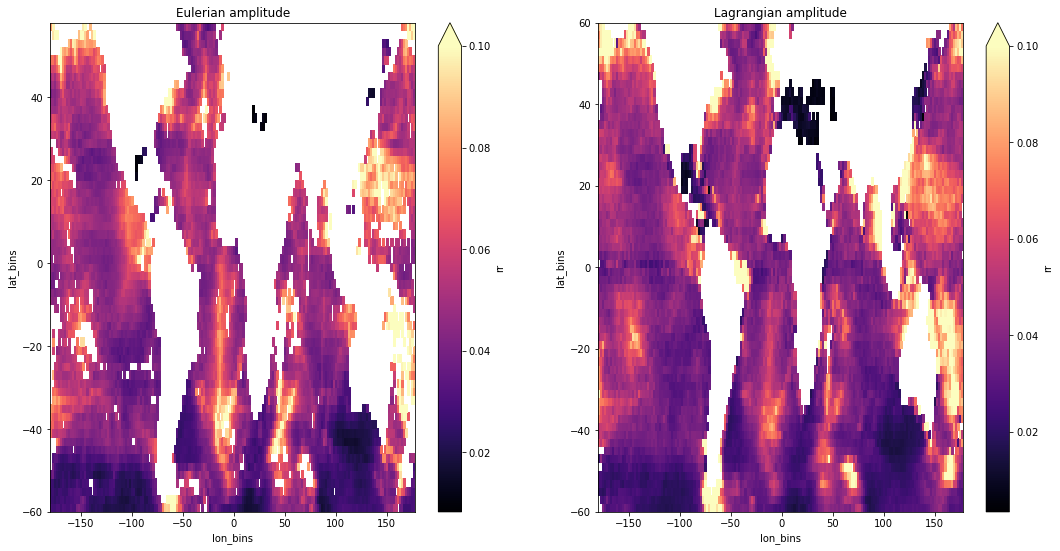

In [24]:
cmap = 'magma'
fig,axs = plt.subplots(1,2,figsize=(18,9))
np.sqrt(dsE.isel(lags=0).rr).plot(ax=axs[0],vmax=0.1,cmap=cmap,y='lat_bins')
axs[0].set_title('Eulerian amplitude')
np.sqrt(dsL.isel(lags=0).rr).plot(ax=axs[1],vmax=0.1,cmap=cmap,y='lat_bins')
axs[1].set_title('Lagrangian amplitude')

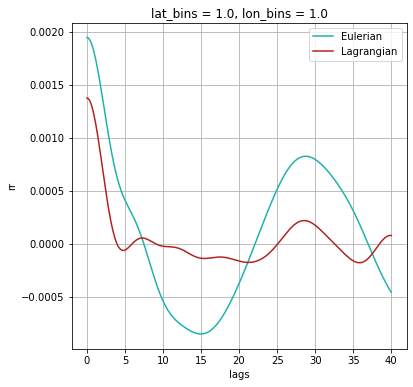

In [27]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
dsE.sel(lat_bins=0,lon_bins=0,method='nearest').rr.plot(ax=ax,c='lightseagreen',label='Eulerian')
dsL.sel(lat_bins=0,lon_bins=0,method='nearest').rr.plot(ax=ax,c='firebrick',label='Lagrangian')
ax.grid();ax.legend()

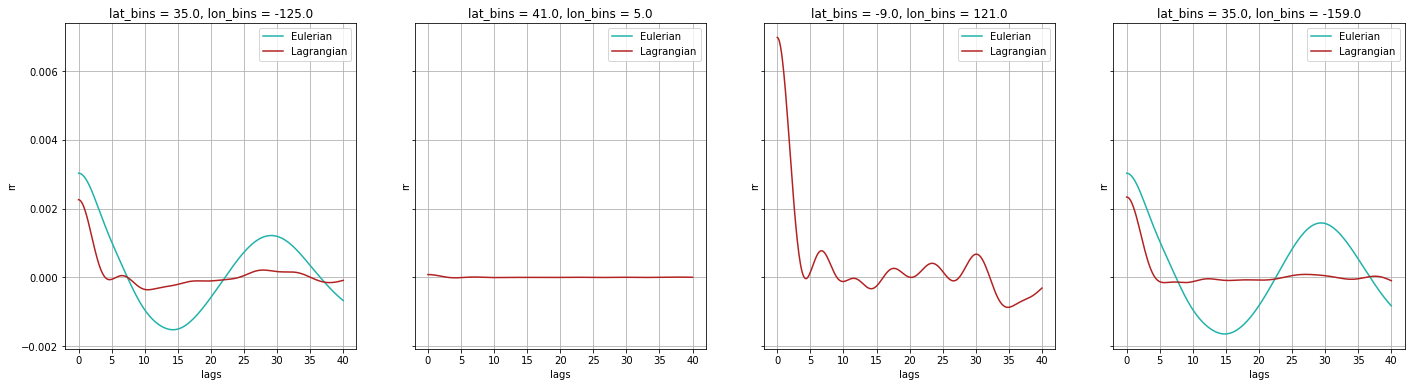

In [28]:
bbox = [bbox_cal,bbox_med,bbox_nwa,bbox_neh]

fig,ax = plt.subplots(1,len(bbox),figsize=(6*len(bbox),6),sharey=True)
for i in range(len(bbox)):
    dsE.sel(lat_bins=bbox[i][1],lon_bins=bbox[i][0],method='nearest').rr.plot(ax=ax[i],c='lightseagreen',label='Eulerian')
    dsL.sel(lat_bins=bbox[i][1],lon_bins=bbox[i][0],method='nearest').rr.plot(ax=ax[i],c='firebrick',label='Lagrangian')
    ax[i].grid();ax[i].legend()

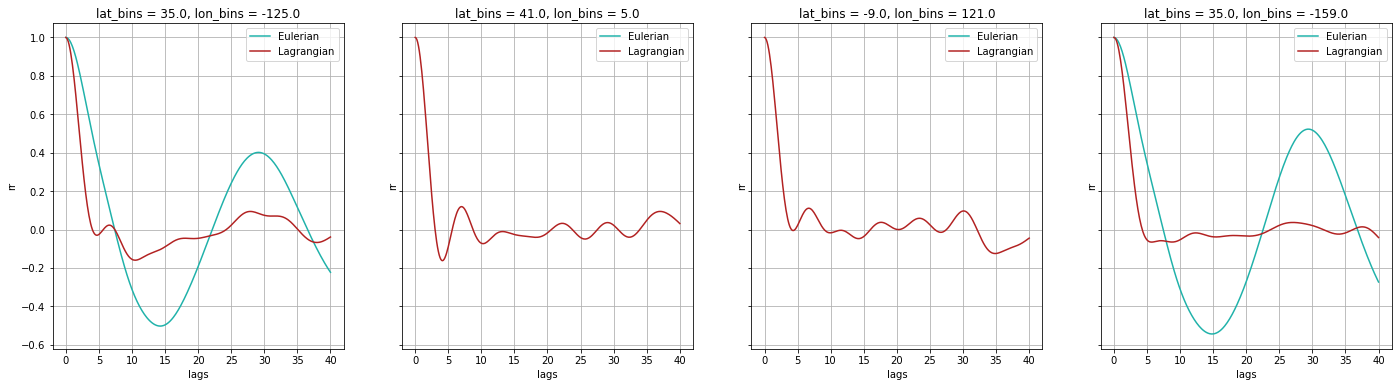

In [29]:
fig,ax = plt.subplots(1,len(bbox),figsize=(6*len(bbox),6),sharey=True)
for i in range(len(bbox)):
    (dsE/dsE.isel(lags=0)).sel(lat_bins=bbox[i][1],lon_bins=bbox[i][0],method='nearest').rr.plot(ax=ax[i],c='lightseagreen',label='Eulerian')
    (dsL/dsL.isel(lags=0)).sel(lat_bins=bbox[i][1],lon_bins=bbox[i][0],method='nearest').rr.plot(ax=ax[i],c='firebrick',label='Lagrangian')
    ax[i].grid();ax[i].legend()

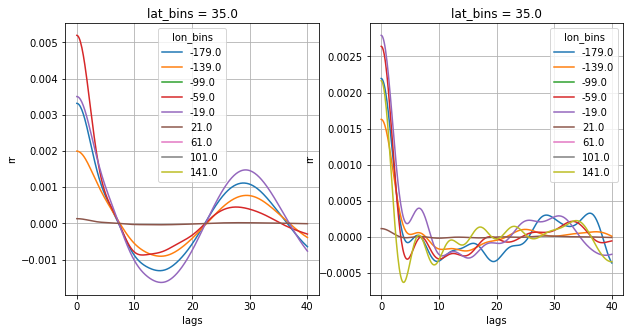

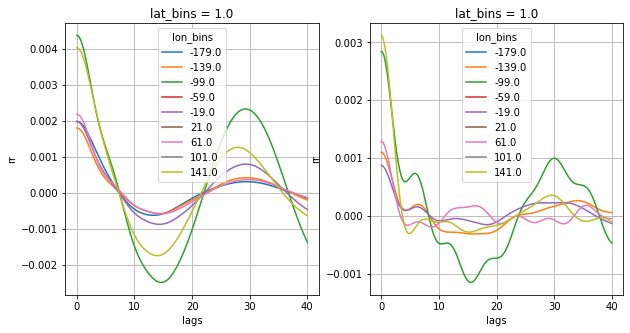

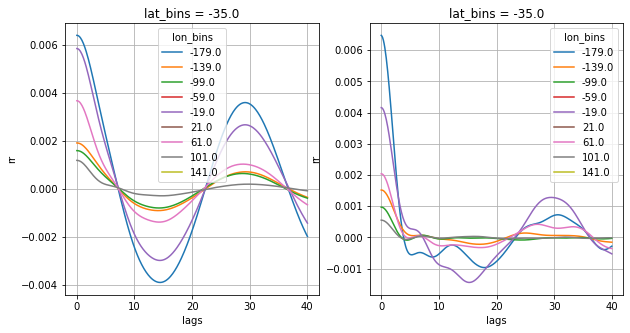

In [44]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
dsE.sel(lat_bins=35,method='nearest').rr.isel(lon_bins=slice(0,None,20)).plot(hue='lon_bins',ax=axs[0])
axs[0].grid()
dsL.sel(lat_bins=35,method='nearest').rr.isel(lon_bins=slice(0,None,20)).plot(hue='lon_bins',ax=axs[1])
axs[1].grid()
fig,axs = plt.subplots(1,2,figsize=(10,5))
dsE.sel(lat_bins=0,method='nearest').rr.isel(lon_bins=slice(0,None,20)).plot(hue='lon_bins',ax=axs[0])
axs[0].grid()
dsL.sel(lat_bins=0,method='nearest').rr.isel(lon_bins=slice(0,None,20)).plot(hue='lon_bins',ax=axs[1])
axs[1].grid()
fig,axs = plt.subplots(1,2,figsize=(10,5))
dsE.sel(lat_bins=-35,method='nearest').rr.isel(lon_bins=slice(0,None,20)).plot(hue='lon_bins',ax=axs[0])
axs[0].grid()
dsL.sel(lat_bins=-35,method='nearest').rr.isel(lon_bins=slice(0,None,20)).plot(hue='lon_bins',ax=axs[1])
axs[1].grid()

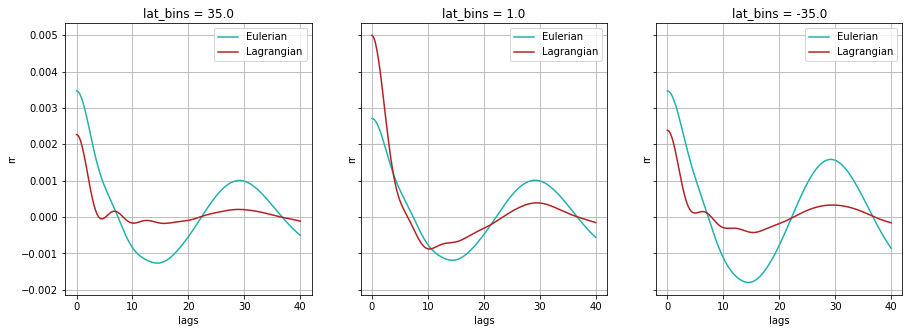

In [42]:
fig,axs = plt.subplots(1,3,figsize=(15,5),sharey=True)
dsE.sel(lat_bins=35,method='nearest').rr.mean('lon_bins').plot(ax=axs[0],c='lightseagreen',label='Eulerian')
dsL.sel(lat_bins=35,method='nearest').rr.mean('lon_bins').plot(ax=axs[0],c='firebrick',label='Lagrangian')
axs[0].grid();axs[0].legend()
dsE.sel(lat_bins=0,method='nearest').rr.mean('lon_bins').plot(ax=axs[1],c='lightseagreen',label='Eulerian')
dsL.sel(lat_bins=0,method='nearest').rr.mean('lon_bins').plot(ax=axs[1],c='firebrick',label='Lagrangian')
axs[1].grid();axs[1].legend()
dsE.sel(lat_bins=-35,method='nearest').rr.mean('lon_bins').plot(ax=axs[2],c='lightseagreen',label='Eulerian')
dsL.sel(lat_bins=-35,method='nearest').rr.mean('lon_bins').plot(ax=axs[2],c='firebrick',label='Lagrangian')
axs[2].grid();axs[2].legend()

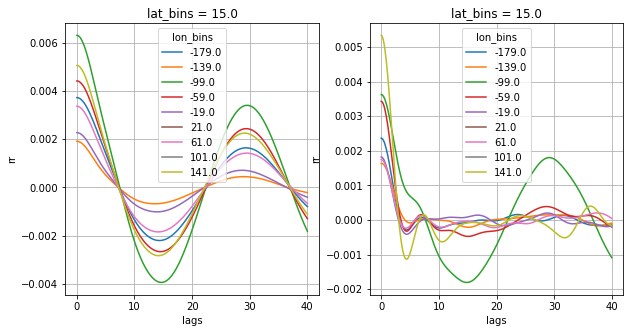

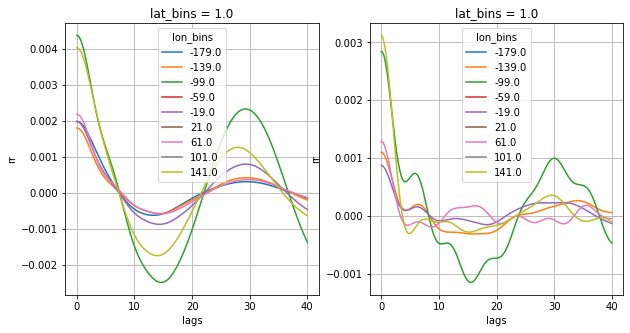

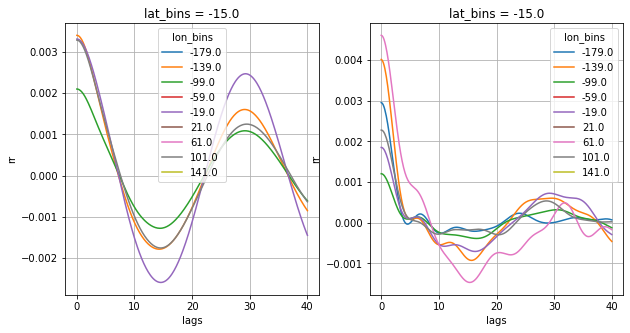

In [45]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
dsE.sel(lat_bins=15,method='nearest').rr.isel(lon_bins=slice(0,None,20)).plot(hue='lon_bins',ax=axs[0])
axs[0].grid()
dsL.sel(lat_bins=15,method='nearest').rr.isel(lon_bins=slice(0,None,20)).plot(hue='lon_bins',ax=axs[1])
axs[1].grid()
fig,axs = plt.subplots(1,2,figsize=(10,5))
dsE.sel(lat_bins=0,method='nearest').rr.isel(lon_bins=slice(0,None,20)).plot(hue='lon_bins',ax=axs[0])
axs[0].grid()
dsL.sel(lat_bins=0,method='nearest').rr.isel(lon_bins=slice(0,None,20)).plot(hue='lon_bins',ax=axs[1])
axs[1].grid()
fig,axs = plt.subplots(1,2,figsize=(10,5))
dsE.sel(lat_bins=-15,method='nearest').rr.isel(lon_bins=slice(0,None,20)).plot(hue='lon_bins',ax=axs[0])
axs[0].grid()
dsL.sel(lat_bins=-15,method='nearest').rr.isel(lon_bins=slice(0,None,20)).plot(hue='lon_bins',ax=axs[1])
axs[1].grid()

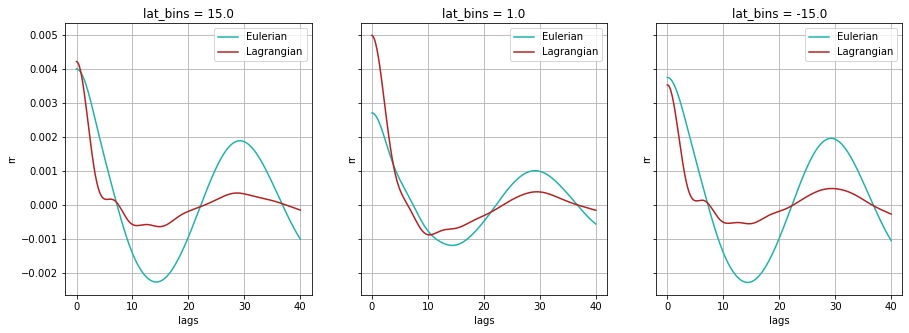

In [43]:
fig,axs = plt.subplots(1,3,figsize=(15,5),sharey=True)
dsE.sel(lat_bins=15,method='nearest').rr.mean('lon_bins').plot(ax=axs[0],c='lightseagreen',label='Eulerian')
dsL.sel(lat_bins=15,method='nearest').rr.mean('lon_bins').plot(ax=axs[0],c='firebrick',label='Lagrangian')
axs[0].grid();axs[0].legend()
dsE.sel(lat_bins=0,method='nearest').rr.mean('lon_bins').plot(ax=axs[1],c='lightseagreen',label='Eulerian')
dsL.sel(lat_bins=0,method='nearest').rr.mean('lon_bins').plot(ax=axs[1],c='firebrick',label='Lagrangian')
axs[1].grid();axs[1].legend()
dsE.sel(lat_bins=-15,method='nearest').rr.mean('lon_bins').plot(ax=axs[2],c='lightseagreen',label='Eulerian')
dsL.sel(lat_bins=-15,method='nearest').rr.mean('lon_bins').plot(ax=axs[2],c='firebrick',label='Lagrangian')
axs[2].grid();axs[2].legend()

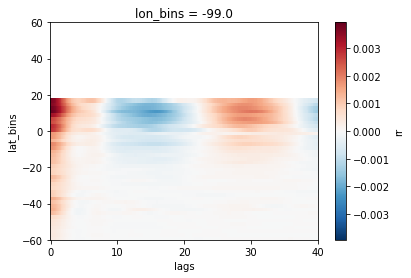

In [48]:
dsL.sel(lon_bins=-99,method='nearest').rr.plot()

Text(0.5, 1.0, 'Lagrangian real-real covariance')

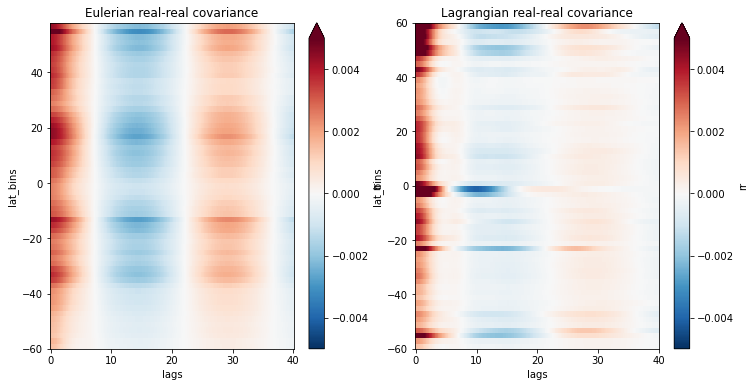

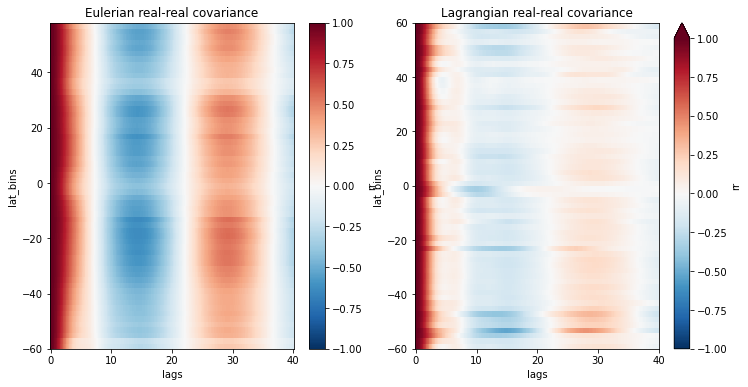

In [7]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
dsE.mean('lon_bins').rr.plot(y='lat_bins',ax=axs[0],vmax=0.005)
dsL.mean('lon_bins').rr.plot(y='lat_bins',ax=axs[1],vmax=0.005)
axs[0].set_title('Eulerian real-real covariance')
axs[1].set_title('Lagrangian real-real covariance')


fig,axs = plt.subplots(1,2,figsize=(12,6))
(dsE.mean('lon_bins')/dsE.mean('lon_bins').isel(lags=0)).rr.plot(y='lat_bins',ax=axs[0],vmax=1)
(dsL.mean('lon_bins')/dsL.mean('lon_bins').isel(lags=0)).rr.plot(y='lat_bins',ax=axs[1],vmax=1)
axs[0].set_title('Eulerian real-real covariance')
axs[1].set_title('Lagrangian real-real covariance')



Text(0.5, 1.0, 'Lagrangian real-real variance')

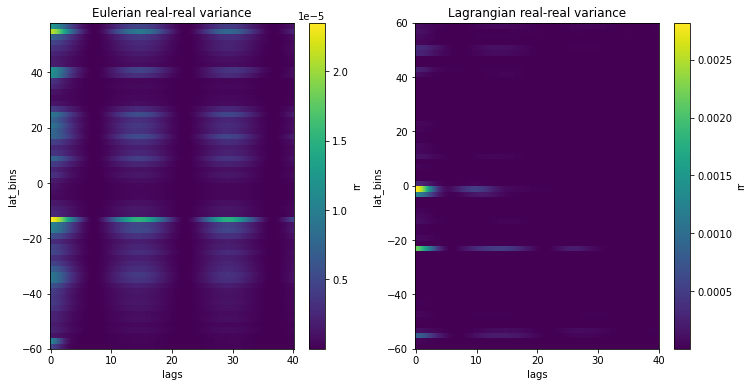

In [9]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
dsE.var('lon_bins').rr.plot(y='lat_bins',ax=axs[0])
dsL.var('lon_bins').rr.plot(y='lat_bins',ax=axs[1])
axs[0].set_title('Eulerian real-real variance')
axs[1].set_title('Lagrangian real-real variance')


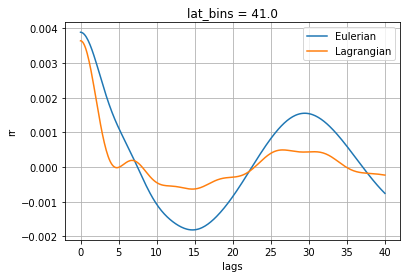

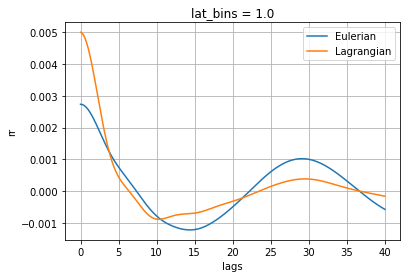

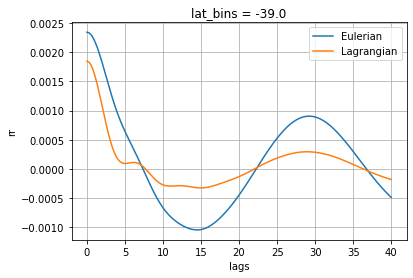

In [11]:
plt.figure()
dsE.mean('lon_bins').sel(lat_bins=40.,method='nearest').Crr.plot(label='Eulerian')
dsL.mean('lon_bins').sel(lat_bins=40.,method='nearest').rr.plot(label='Lagrangian')
plt.grid();plt.legend()

plt.figure()
dsE.mean('lon_bins').sel(lat_bins=.5).Crr.plot(label='Eulerian')
dsL.mean('lon_bins').sel(lat_bins=1.).rr.plot(label='Lagrangian')
plt.grid();plt.legend()

plt.figure()
dsE.mean('lon_bins').sel(lat_bins=-40.,method='nearest').Crr.plot(label='Eulerian')
dsL.mean('lon_bins').sel(lat_bins=-40.,method='nearest').rr.plot(label='Lagrangian')
plt.grid();plt.legend()
#dsL.mean('lon_bins').sel(lat_bins=-1.).rr.plot()

In [31]:
number = dsE.mean('lon_bins').Crr.isel(lat_bins=slice(0,None,10)).lat_bins.size

cmap = plt.get_cmap('bone')
#colors_Ta = [cmap_Ta(i) for i in np.linspace(0.5, 1, number)]
colors = [cmap(i) for i in np.linspace(0., .8, number)]




In [32]:
dsE_sub = dsE.mean('lon_bins').Crr.isel(lat_bins=slice(0,None,10))
dsL_sub = dsL.mean('lon_bins').rr.isel(lat_bins=slice(0,None,10))

(-0.7, 1.1)

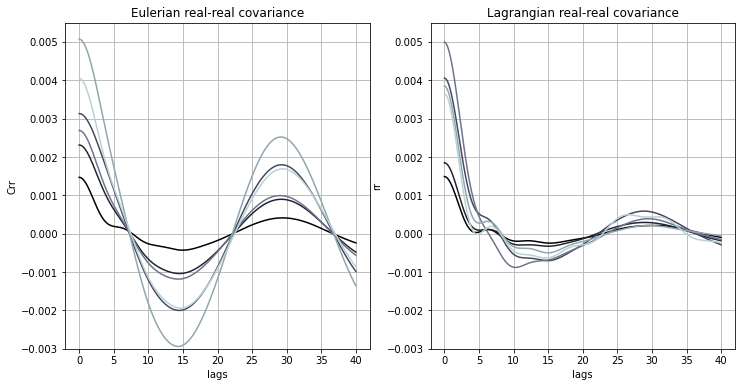

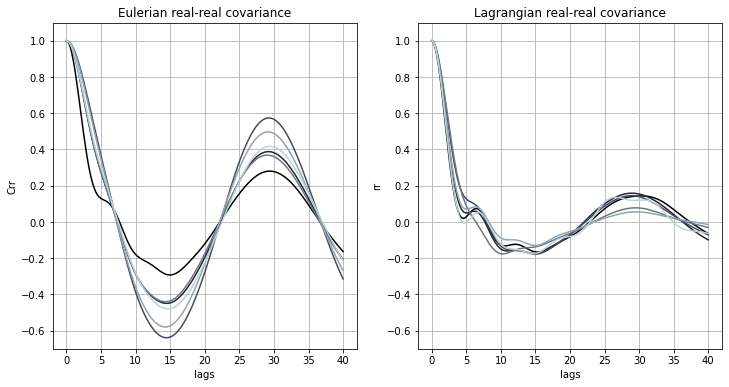

In [33]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
for i,c in enumerate(colors):
    dsE_sub.isel(lat_bins=i).plot(ax=axs[0],c=c)
    dsL_sub.isel(lat_bins=i).plot(ax=axs[1],c=c)
axs[0].set_title('Eulerian real-real covariance')
axs[1].set_title('Lagrangian real-real covariance')
axs[0].grid();axs[1].grid()
axs[0].set_ylim(-0.003,0.0055);axs[1].set_ylim(-0.003,0.0055)

fig,axs = plt.subplots(1,2,figsize=(12,6))
for i,c in enumerate(colors):
    (dsE_sub/dsE_sub.isel(lags=0)).isel(lat_bins=i).plot(ax=axs[0],c=c)
    (dsL_sub/dsL_sub.isel(lags=0)).isel(lat_bins=i).plot(ax=axs[1],c=c)
#(dsE.mean('lon_bins')/dsE.mean('lon_bins').isel(lags=0)).Crr.isel(lat_bins=slice(0,None,10)
#                                                                 ).plot(hue='lat_bins',ax=axs[0],add_legend=False)
#(dsL.mean('lon_bins')/dsL.mean('lon_bins').isel(lags=0)).rr.isel(lat_bins=slice(0,None,10)
#                                                                ).plot(hue='lat_bins',ax=axs[1],add_legend=False)
axs[0].set_title('Eulerian real-real covariance')
axs[1].set_title('Lagrangian real-real covariance')
axs[0].grid();axs[1].grid();axs[0].set_ylim(-0.7,1.1);axs[1].set_ylim(-0.7,1.1)

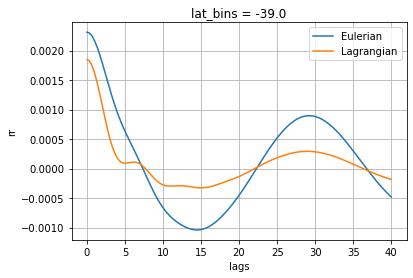

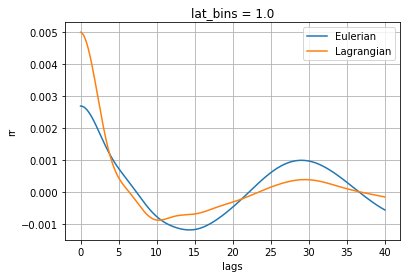

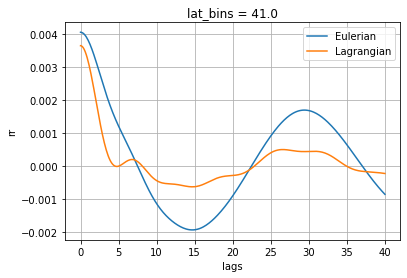

In [44]:
dsE_sub.isel(lat_bins=1).plot(label='Eulerian')
dsL_sub.isel(lat_bins=1).plot(label='Lagrangian')
plt.grid();plt.legend()

plt.figure()
dsE_sub.isel(lat_bins=-3).plot(label='Eulerian')
dsL_sub.isel(lat_bins=-3).plot(label='Lagrangian')
plt.grid();plt.legend()

plt.figure()
dsE_sub.isel(lat_bins=-1).plot(label='Eulerian')
dsL_sub.isel(lat_bins=-1).plot(label='Lagrangian')
plt.grid();plt.legend()